In [1]:
import sys
import os

CUR_DIR = os.getcwd()
CUR_DIR = CUR_DIR.replace("\\", "/").replace('/exp','')
sys.path.append(CUR_DIR)

In [2]:
from dotenv import load_dotenv
import os
from app.exa import ExaAPI
from app.schemas.llm import ChatRequest, Message
from pydantic import BaseModel
from app.llm import LiteLLMKit
from app.jina import JinaReader

load_dotenv()

exa_api = ExaAPI(api_key=os.getenv("EXA_API_KEY"))
client = LiteLLMKit(model_name="gpt-4o", temperature=0.7, max_tokens=1024, stream=False)
reader = JinaReader(api_key=os.getenv("JINA_API_KEY"))

In [3]:
from app.routers.market_analysis import MarketAnalyzer

In [4]:
ma = MarketAnalyzer()

In [5]:
res = ma.breakdown_problem("WHats the market for NPC as an service? in AR, MR and gaming?")

In [6]:
res

ProblemBreakdown(questions=['What are the current trends and market size for Non-Player Character (NPC) as a Service in the Augmented Reality (AR) industry?', 'How is Non-Player Character (NPC) as a Service being utilized in the Mixed Reality (MR) industry, and what is its market potential?', 'What are the key drivers and challenges affecting the adoption of NPC as a Service in the gaming industry?', 'Who are the major players and stakeholders in providing NPC as a Service across AR, MR, and gaming sectors, and what strategies are they using?', 'What are the technological advancements and innovations driving the development of NPC as a Service in AR, MR, and gaming industries?'])

In [7]:
tg = await ma.generate_trend_visualization()

In [8]:
tg

MarketTrendVisualization(x_axis_labels=['2019', '2020', '2021', '2022', '2023', '2024', '2025'], y_axis_labels=['Market Growth Rate (%)', 'Innovation Index', 'Investment Sentiment', 'Technology Adoption', 'Competitive Intensity'], x_axis_name='Year', y_axis_name='Metrics', data=[[3.2, 2.8, 3.5, 4.0, 4.5, 4.7, 5.1], [60.0, 62.5, 65.0, 68.0, 70.5, 72.0, 74.5], [55.0, 48.0, 60.0, 58.0, 62.0, 65.0, 68.0], [40.0, 42.0, 48.0, 52.0, 58.0, 63.0, 67.0], [50.0, 52.0, 55.0, 53.0, 56.0, 58.0, 59.0]], reasoning='The trend data encapsulates a multi-year analysis of market dynamics across five critical metrics: Market Growth Rate, Innovation Index, Investment Sentiment, Technology Adoption, and Competitive Intensity. Each metric is designed to reflect key economic and technological influences from 2019 through 2025.\n\n1. **Market Growth Rate:** Starting at 3.2% in 2019, this metric shows a steady increase, reflecting post-pandemic recovery and economic stabilization. The gradual rise to 5.1% by 2025

In [9]:
img_tg = ma.visualize_trend(tg)

In [10]:
img_tg

{'img': 'iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAD3iUlEQVR4nOzdeXxU9bk/8M+ZfUkmC0kmCYQkQNhlEQiooKhsVsUdFRXU9trN21rqry6tdaki3rZoe1ttr1oEEUHcqlZBUHFlUxOUPUASIHvIPvvMOb8/zsxkJjOTTEKWSfJ5v15xkjNnzpwTJyH55HmeryBJkgQiIiIiIiIiIqIYpejrEyAiIiIiIiIiImoPAywiIiIiIiIiIoppDLCIiIiIiIiIiCimMcAiIiIiIiIiIqKYxgCLiIiIiIiIiIhiGgMsIiIiIiIiIiKKaQywiIiIiIiIiIgopjHAIiIiIiIiIiKimMYAi4iIiIiIiIiIYhoDLCIiIiIiIiIiimkMsIiIiIiIiIiIKKYxwCIiIiIiIiIiopjGAIuIiIiIiIiIiGIaAywiIiIiIiIiIoppDLCIiIioS0pKSiAIAv70pz/19anELEEQ8Mgjj/T1abTL9//xpZde6pHj5+Tk4Pbbb++RY8eyRx55BIIg9PVpEBERDRgMsIiIiPqxl156CYIgQBAEfPHFFyH3S5KErKwsCIKAK664og/OMHobNmzAM8880+F+vmCgo7e5c+f2+Dl3t0OHDkEQBOh0OjQ0NPT16fQLvteDQqHAqVOnQu5vamqCXq+HIAi4++67u/QcK1euxNtvv32WZ0pERERnQ9XXJ0BERERnT6fTYcOGDZg9e3bQ9k8//RSnT5+GVqvtozOL3oYNG7B//37cc8897e537bXXYtSoUf6PW1pa8NOf/hTXXHMNrr32Wv92s9ncU6faY9avX4/09HTU19fj9ddfx49+9KO+PqWzduTIESgUPf83U61Wi1dffRW

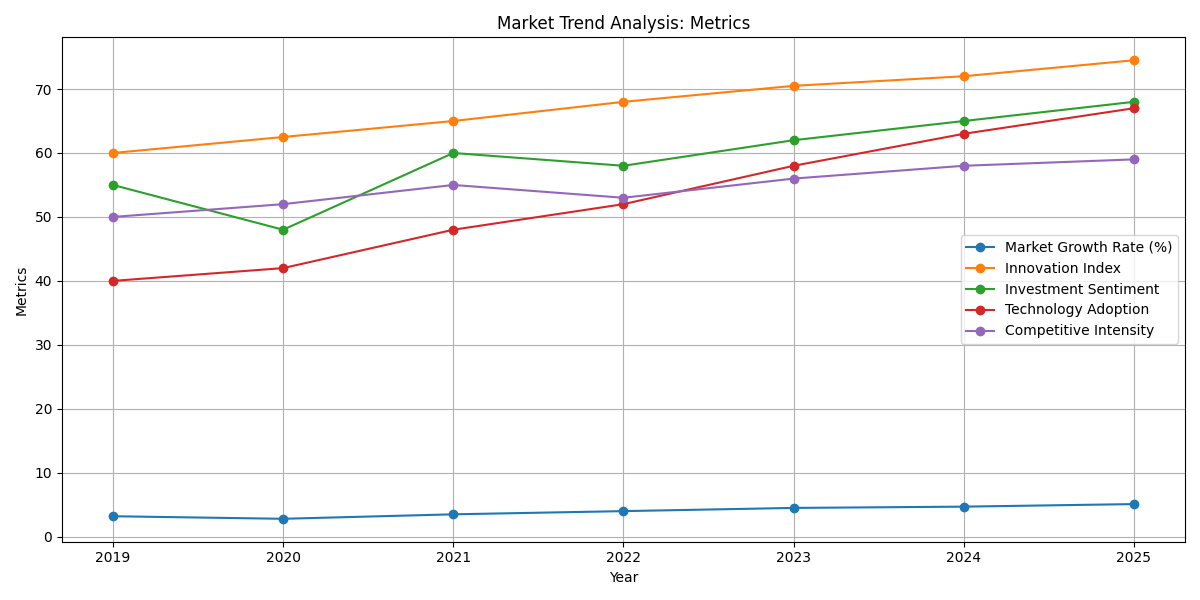

In [11]:
import base64
from io import BytesIO

# convert base64 to image
def base64_to_image(base64_string):
    imgdata = base64.b64decode(base64_string)
    return BytesIO(imgdata)

img = base64_to_image(img_tg['img'])
# display image
from PIL import Image

Image.open(img)

In [12]:
ma.perform_analysis()

Yearly insights for original query: [{'year': 2019, 'question': 'WHats the market for NPC as an service? in AR, MR and gaming?', 'analysis': "In 2019, the market for NPC (Non-Player Character) as a service in AR (Augmented Reality), MR (Mixed Reality), and gaming was developing rapidly, driven by several factors:\n\n### Market Size and Growth\n- The gaming industry was on a growth trajectory, with significant investments in AR and MR technologies, which were expected to enhance gaming experiences by integrating NPCs more seamlessly into games.\n- The augmented and mixed reality sectors were growing steadily, providing new opportunities for NPC development and integration. The demand for immersive gaming experiences was pushing the market forward.\n\n### Key Technological Developments\n- Advances in artificial intelligence were crucial for the development of more sophisticated NPCs that could interact dynamically with players, providing a more engaging gaming experience.\n- The integrat

Exception: Sync completion failed: litellm.BadRequestError: litellm.ContextWindowExceededError: ContextWindowExceededError: OpenAIException - Error code: 400 - {'error': {'message': "This model's maximum context length is 128000 tokens. However, your messages resulted in 285304 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [ ]:
report = ma.compile_comprehensive_report()

In [ ]:
report

In [ ]:
str(ma.reports)

In [ ]:
final_report = ma.get_report()

In [ ]:
final_report.__dict__

In [ ]:
print(final_report.comprehensive_report)